In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import random

# class VAE(nn.Module):
#     def __init__(self, fcd, ld, matsz, rank):
#         super(VAE, self).__init__()
#         self.fcd = fcd
#         self.ld = ld
#         self.matsz = matsz
#         self.rank = rank
#         self.enc1 = nn.Linear(fcd, 1000).float().cuda()
#         self.enc2 = nn.Linear(1000, ld).float().cuda()
#         self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
#         self.dec2 = nn.Linear(1000, matsz*rank).float().cuda()

#     def enc(self, x):
#         x = F.relu(self.enc1(x))
#         z = self.enc2(x)
#         return z

#     def gen(self, n):
#         return torch.randn(n, self.ld).float().cuda()/(10**0.5)

#     def dec(self, z, age, sex, race, rest, nback, emoid):
#         z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
#                        rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
#         x = F.relu(self.dec1(z))
#         x = self.dec2(x)
#         x = x.reshape(len(z), self.matsz, self.rank)
#         x = torch.einsum('abc,adc->abd', x, x)
#         return x

#     def vectorize(self, x):
#         a,b = np.triu_indices(self.matsz, 1)
#         return x[:,a,b]

class VAE(nn.Module):
    def __init__(self, fcd, ld):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, fcd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 30)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z30_cov6.torch'))
vae.eval()

print('Done')

/tmp/ipykernel_51594/3110210199.py:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PN

Done


In [2]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [3]:
# Load FC

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'
demo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
race = []
sex = []
age = []
wrat = []
subids = []

a,b = np.triu_indices(264,1)

for sub in demo['age_at_cnb']:
    try:
        ra = demo['Race'][sub]
        ag = demo['age_at_cnb'][sub]
        se = demo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(remap(vec2mat(r))[a,b])
        nback.append(remap(vec2mat(n))[a,b])
        emoid.append(remap(vec2mat(e))[a,b])
        subids.append(sub)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

# age = (age - np.mean(age)) / np.std(age)

print([a.shape for a in [rest, nback, emoid, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193,), (1193,), (1193,)]


In [4]:
class VAEKL(nn.Module):
    def __init__(self, ld):
        super(VAEKL, self).__init__()
        self.ld = ld
        self.enc1 = nn.Linear(34716, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, 34716).float().cuda()

    def enc(self, x):
        z = F.relu(self.enc1(x))
        z = self.enc2(z)
        return z

    def dec(self, z):
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

    def gen(self, n):
        z = torch.randn(n, self.ld).float().cuda()
        return self.dec(z)

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, z

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def klloss(z):
    N = z.shape[1]
    sigma = torch.std(z, dim=0)
    mu = torch.mean(z, dim=0)
    loss = torch.sum(sigma**2)+torch.sum(mu**2)-2*torch.sum(torch.log(sigma))
    return loss

def pretty(a):
    return f'{round(float(a), 4)}'

vaekl = VAEKL(30)
optim = torch.optim.Adam(vaekl.parameters(), lr=1e-4, weight_decay=5e-5)

nepochs = 1500
pperiod = 50

x = torch.from_numpy(rest).float().cuda()

for e in range(nepochs):
    optim.zero_grad()
    xhat, z = vaekl(x)
    loss_recon = rmse(xhat, x)
    loss_kl = klloss(z)
    (loss_recon+loss_kl).backward()
    optim.step()
    if e % pperiod == 0 or e == nepochs-1:
        print(f'{e} {pretty(loss_recon)} {pretty(loss_kl)}')

print('Done')

0 0.3867 179.9018
50 0.2227 30.1974
100 0.2049 30.0008
150 0.195 30.0
200 0.1888 30.0
250 0.185 30.0
300 0.1825 30.0
350 0.1808 30.0
400 0.1795 30.0
450 0.1787 30.0754
500 0.1779 30.0004
550 0.1772 30.0
600 0.1772 30.451
650 0.1762 30.0014
700 0.1759 30.0049
750 0.1754 30.0643
800 0.175 30.0015
850 0.1748 30.0113
900 0.1748 30.2423
950 0.1744 30.0976
1000 0.1739 30.0242
1050 0.1737 30.0015
1100 0.1737 30.0101
1150 0.1733 30.0677
1200 0.1732 30.0115
1250 0.173 30.0364
1300 0.1731 30.2228
1350 0.1729 30.1733
1400 0.1724 30.0129
1450 0.1724 30.029
1499 0.1721 30.0196
Done


In [5]:
n = 1000

with torch.no_grad():
    age = torch.randn(n).float().cuda()
    sex = torch.randint(high=2, size=(n,)).float().cuda()
    race = torch.randint(high=2, size=(n,)).float().cuda()
    task = torch.randint(high=3, size=(n,)).float().cuda()
    rt = torch.ones(n).float().cuda()
    nt = torch.zeros(n).float().cuda()
    et = torch.zeros(n).float().cuda()
    # rt[task == 0] = 1
    # nt[task == 1] = 1
    # et[task == 2] = 1
    z = vae.gen(n)
    fake = vae.dec(z, age, sex, race, rt, nt, et)
    fake = fake.detach().cpu().numpy()

print(fake.shape)

(1000, 34716)


In [6]:
with torch.no_grad():
    fakebad = vaekl.gen(n).detach().cpu().numpy()

print(fakebad.shape)

(1000, 34716)


In [7]:
# GAN

import random

mygen = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/mygen2.pkl', 'rb'))

def gen(n, age, sex, race, task='rest', var=False):
    rest = int(task == 'rest')
    nback = int(task == 'nback')
    emoid = int(task == 'emoid')
    x = np.random.normal(loc=0, scale=1, size=(n, 10))
    y = np.concatenate([
        np.ones((n,1))*age,
        np.ones((n,1))*sex,
        np.ones((n,1))*(1-sex),
        np.ones((n,1))*race,
        np.ones((n,1))*(1-race),
        np.ones((n,1))*rest,
        np.ones((n,1))*nback,
        np.ones((n,1))*emoid], axis=1)
    x = np.concatenate([x, y], axis=1)
    w1 = mygen['gen_enc1_w']
    b1 = mygen['gen_enc1_bias']
    x = x @ w1 + b1
    # ReLU
    x[x < 0] = 0
    w2 = mygen['gen_enc2_w']
    b2 = mygen['gen_enc2_bias']
    x = x @ w2 + b2
    # AE Decode
    w3 = mygen['enc_dec1_w']
    b3 = mygen['enc_dec1_bias']
    x = x @ w3 + b3
    x = x.reshape((n, 264, 5))
    x = np.einsum('ijk,ilk->ijl', x, x)
    # Clamp non-real values
    for i in range(len(x)):
        mx = np.max(np.abs(x[i]))  
        if mx > 1:
            x[x > 1] = 1
            x[x < -1] = -1
    if var:
        x = np.var(x, axis=0)
    else:
        x = np.mean(x, axis=0)
    return x

gans = []

for _ in range(n):
    ag = random.randint(8,22)
    se = random.randint(0,1)
    ra = random.randint(0,1)
    gan = gen(1,ag,se,ra)
    gans.append(gan[a,b])

gans = np.stack(gans)
print(gans.shape)

(1000, 34716)


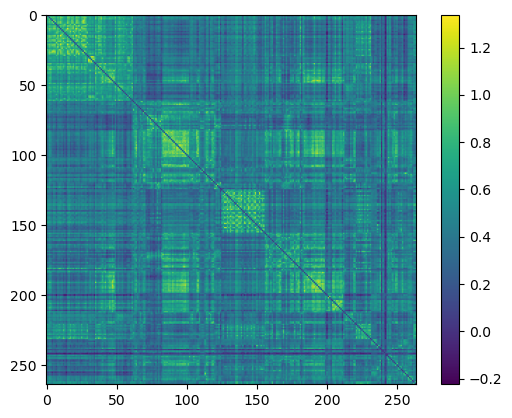

In [9]:
import matplotlib.pyplot as plt

X = vec2mat(fakebad[3])
plt.imshow(X)
plt.colorbar()
plt.show()

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(np.concatenate([rest,fake,gans,fakebad]))
rest_tsne = tsne[:len(rest)]
fake_tsne = tsne[len(rest):len(rest)+len(fake)]
gans_tsne = tsne[len(rest)+len(fake):len(rest)+len(fake)+len(gans)]
fakebad_tsne = tsne[len(rest)+len(fake)+len(gans):]

print('Done')

Done


In [11]:
# Save data

direct = '/home/anton/Documents/Tulane/Research/Work/DemoVAE/texttovis/'

np.savetxt(f'{direct}/rest-tsne.csv', rest_tsne, delimiter=',', fmt='%.3e')
np.savetxt(f'{direct}/fake-tsne.csv', fake_tsne, delimiter=',', fmt='%.3e')
np.savetxt(f'{direct}/fakebad-tsne.csv', fakebad_tsne, delimiter=',', fmt='%.3e')
np.savetxt(f'{direct}/gans-tsne.csv', gans_tsne, delimiter=',', fmt='%.3e')

print('Done')

Done


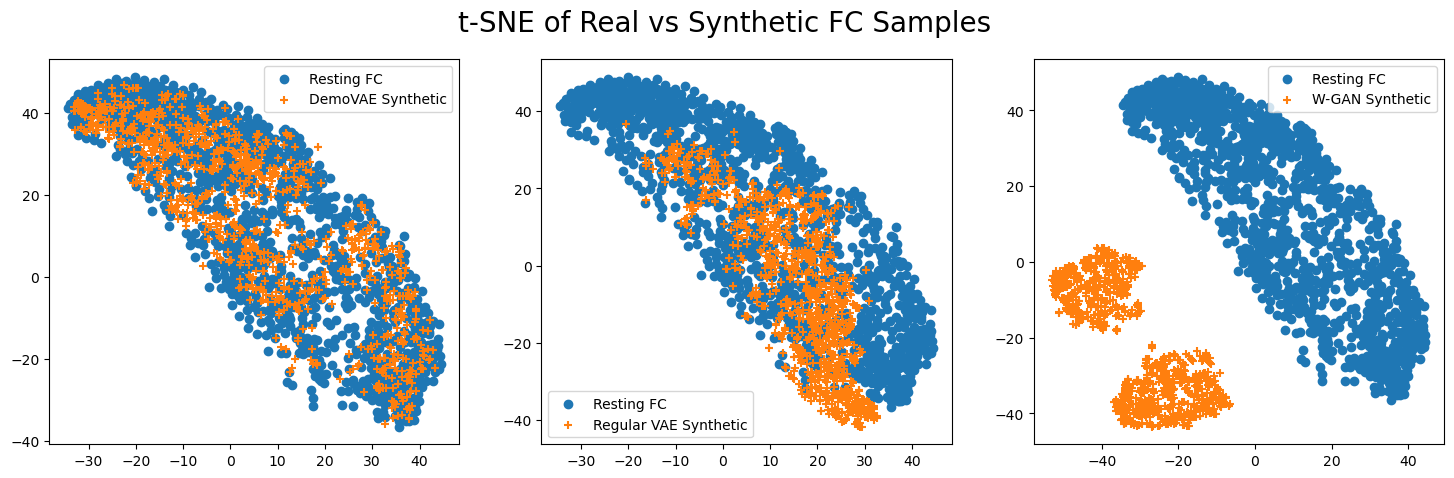

In [14]:
import matplotlib.pyplot as plt

direct = '/home/anton/Documents/Tulane/Research/Work/DemoVAE/texttovis/'

rest_tsne = np.loadtxt(f'{direct}/rest-tsne.csv', delimiter=',')
fake_tsne = np.loadtxt(f'{direct}/fake-tsne.csv', delimiter=',')
fakebad_tsne = np.loadtxt(f'{direct}/fakebad-tsne.csv', delimiter=',')
gans_tsne = np.loadtxt(f'{direct}/gans-tsne.csv', delimiter=',')

fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].scatter(rest_tsne[:,0], rest_tsne[:,1], label='Resting FC')
ax[0].scatter(fake_tsne[:,0], fake_tsne[:,1], s=35, marker='+', label='DemoVAE Synthetic')

ax[1].scatter(rest_tsne[:,0], rest_tsne[:,1], label='Resting FC')
ax[1].scatter(fakebad_tsne[:,0], fakebad_tsne[:,1], s=35, marker='+', label='Regular VAE Synthetic')

ax[2].scatter(rest_tsne[:,0], rest_tsne[:,1], label='Resting FC')
ax[2].scatter(gans_tsne[:,0], gans_tsne[:,1], s=35, marker='+', label='W-GAN Synthetic')

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('t-SNE of Real vs Synthetic FC Samples', fontsize=20)
fig.savefig('/home/anton/Documents/Tulane/Research/Work/DemoVAE/texttovis/tsne.png')
# fig.savefig('/home/anton/Documents/Tulane/Research/Work/CL-VAE/tsne-fc.pdf')
fig.show()

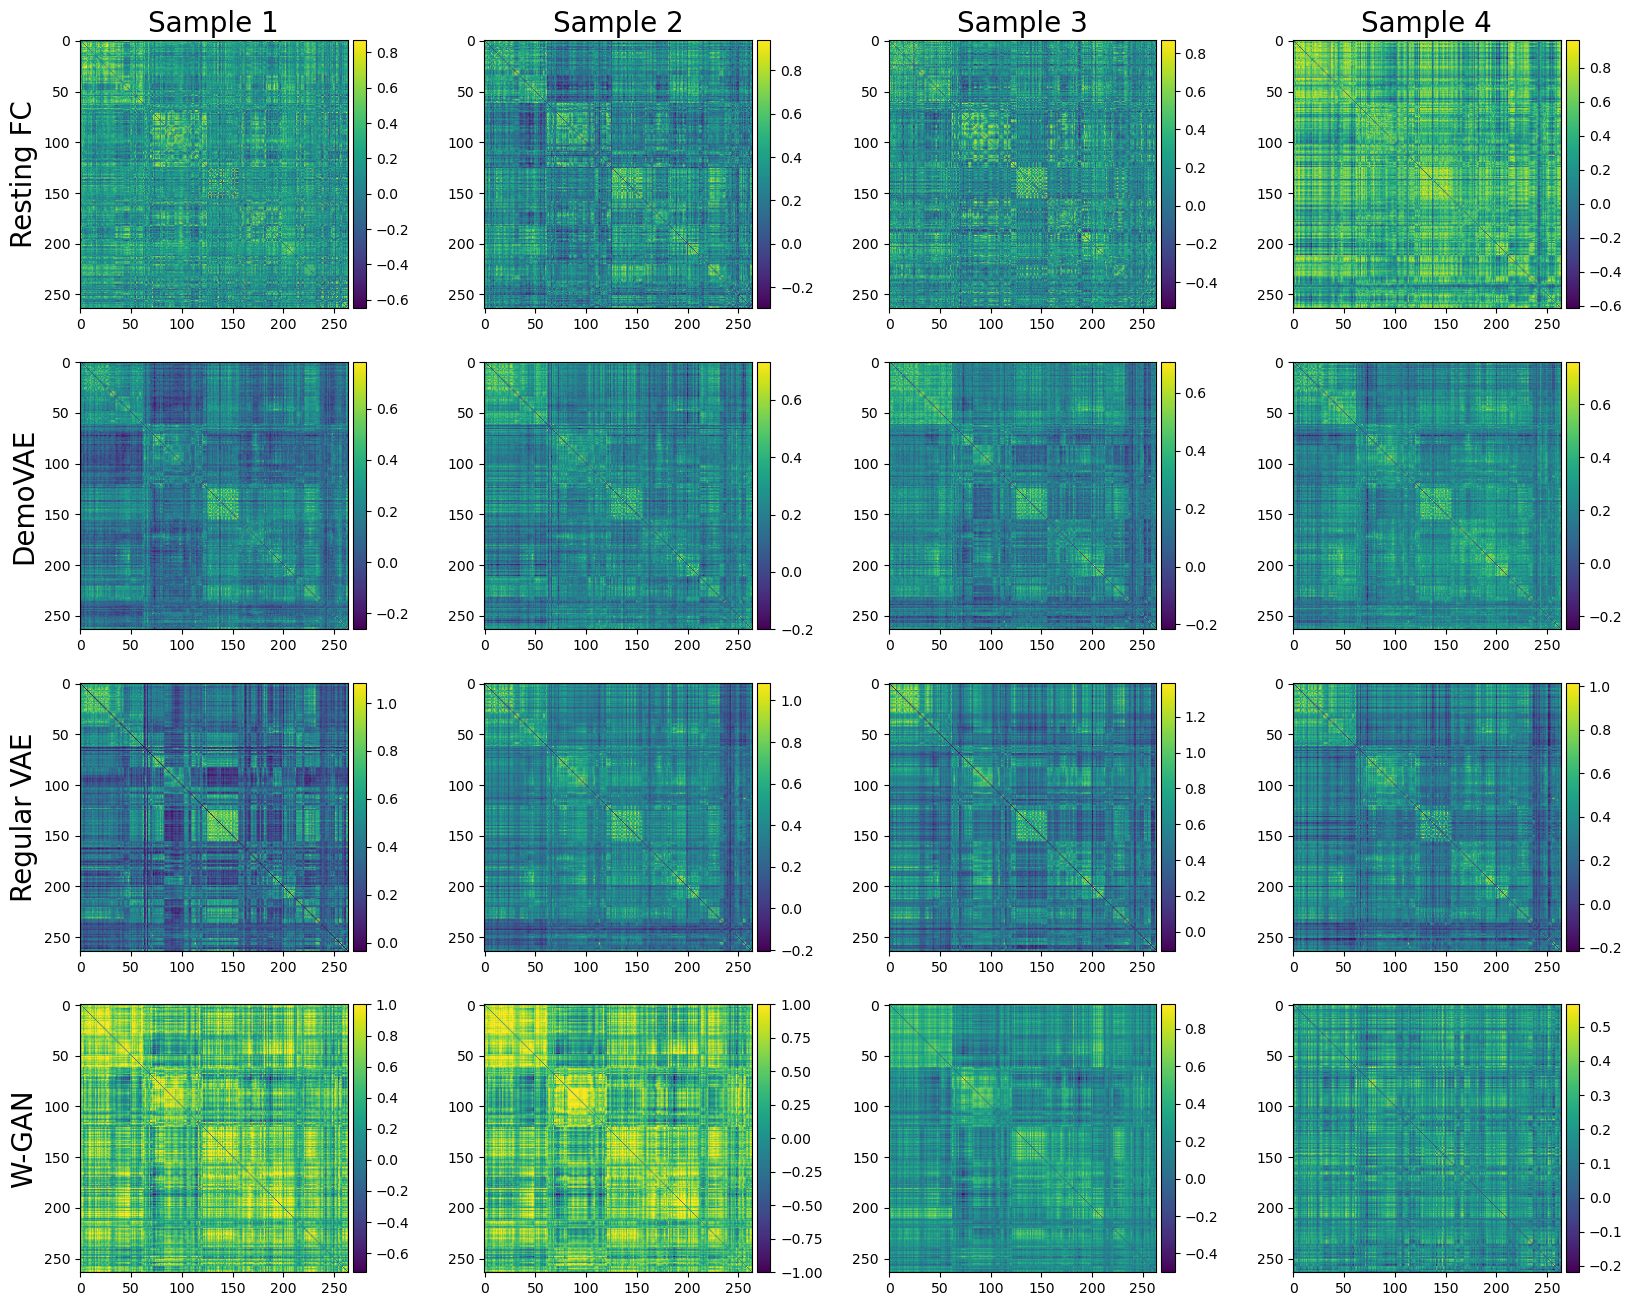

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(4,4,figsize=(20,16))

for i in range(4):
    im = ax[0,i].imshow(vec2mat(rest[i]))

    divider = make_axes_locatable(ax[0,i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    im = ax[1,i].imshow(vec2mat(fake[i]))

    divider = make_axes_locatable(ax[1,i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    im = ax[2,i].imshow(vec2mat(fakebad[i]))

    divider = make_axes_locatable(ax[2,i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    im = ax[3,i].imshow(vec2mat(gans[i]))

    divider = make_axes_locatable(ax[3,i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    fig.colorbar(im, cax=cax, orientation='vertical')

ax[0,0].set_ylabel('Resting FC', fontsize=20)
ax[1,0].set_ylabel('DemoVAE', fontsize=20)
ax[2,0].set_ylabel('Regular VAE', fontsize=20)
ax[3,0].set_ylabel('W-GAN', fontsize=20)
ax[0,0].set_title('Sample 1', fontsize=20)
ax[0,1].set_title('Sample 2', fontsize=20)
ax[0,2].set_title('Sample 3', fontsize=20)
ax[0,3].set_title('Sample 4', fontsize=20)

# fig.savefig('/home/anton/Documents/Tulane/Research/Work/CL-VAE/samples.pdf')
fig.show()